# SIREN

In [4]:
# imports
import sys
sys.path.insert(1, 'C:/Users/jo77pihe/Documents/MasterThesis_OfSpinesAndDendrites')
from imagequalitymetrics import ImageQualityMetrics
from SIREN import SIREN
import matplotlib.pyplot as plt
import numpy as np
import imageio as io
import tensorflow as tf


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

*Which Network architecture can sufficiently approximate the 2P-images?*

In [3]:
stack = np.asarray(io.mimread(
    r"D:\jo77pihe\Registered\Deconved\Alessandro_427_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A2.tif"),
    dtype=np.float32)[1::4, ::2, ::2]
y = stack.reshape(-1) / stack.max() * 2 - 1
gt = stack/stack.max() * 2 - 1

steps = 5000
step_to_plot = 50

met = ImageQualityMetrics()

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [10:22<00:00,  8.04it/s]


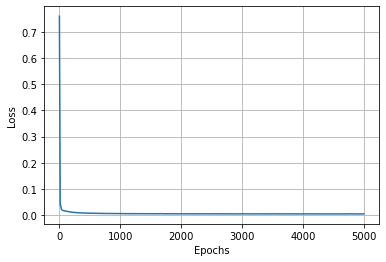

-1.1543381 1.1698365
0 99


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [10:42<00:00,  7.78it/s]


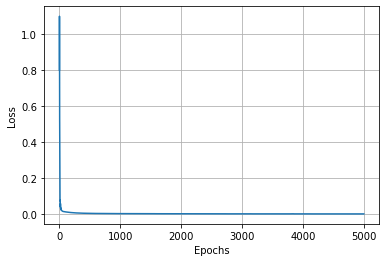

-1.1277854 1.1390153
0 99


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [11:58<00:00,  6.96it/s]


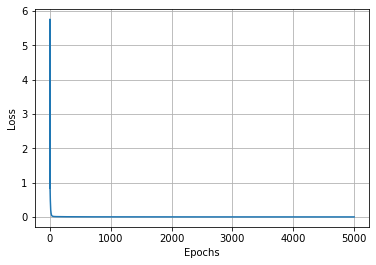

-1.1150999 1.161756
0 99


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [19:01<00:00,  4.38it/s]


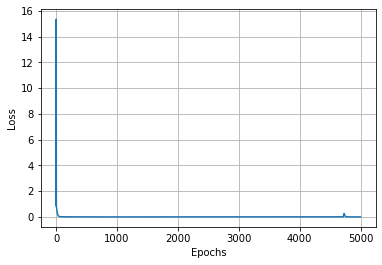

-1.1709895 0.9104246
0 99


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [10:59<00:00,  7.59it/s]


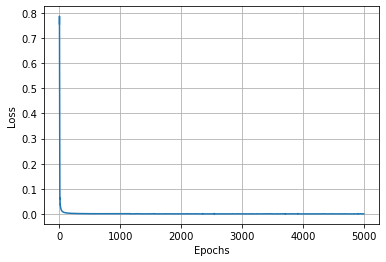

-1.0587026 0.9222984
1 99


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [12:27<00:00,  6.69it/s]


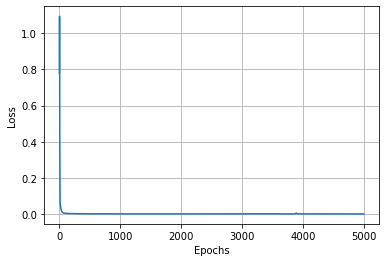

-1.0363656 0.95047265
1 99


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [17:05<00:00,  4.88it/s]


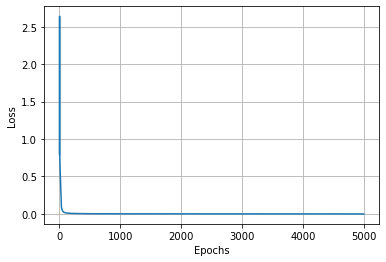

-1.0476296 0.98967934
1 99


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [30:43<00:00,  2.71it/s]


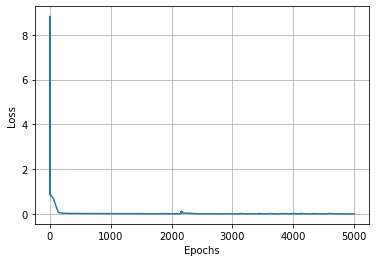

-1.0022951 0.88693666
1 99


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [12:22<00:00,  6.74it/s]


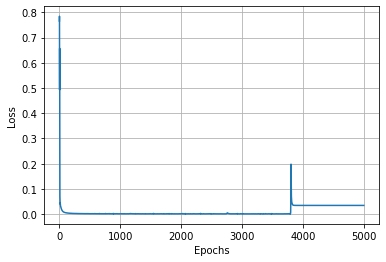

-0.8490773 -0.815808
2 99


 45%|██████████████████████████████████▊                                           | 2235/5000 [07:06<08:48,  5.24it/s]


InternalError: Could not synchronize CUDA stream: CUDA_ERROR_ILLEGAL_ADDRESS: an illegal memory access was encountered

In [9]:
n_layers = [1,4,7]
hidden_dims = [64,128,256,512]
res_psnr = np.zeros((len(n_layers), len(hidden_dims),steps//step_to_plot+1))
res_ssim = np.zeros((len(n_layers), len(hidden_dims),steps//step_to_plot+1))
labs = []
for (nx, nl) in enumerate(n_layers):
    for (hx, hd) in enumerate(hidden_dims):
        m = SIREN(in_features=3, out_features=1, hidden_features=hd,hidden_layers=nl, outermost_linear=True)
        X = m.get_mgrid3(stack.shape, z=.05)
        int_img, s=m.train(steps, X,y,step_to_plot, stack.shape)
        print(np.min(int_img[len(int_img)-1]), np.max(int_img[len(int_img)-1]))
        for (idx,i) in enumerate(int_img):
            res_psnr[nx,hx,idx] = met.psnr(i, gt)
            res_ssim[nx,hx,idx] = met.ssim(i, gt)
        labs.append('Layers: ' + str(nl)+', Hidden_dim: '+ str(hd))
        print(str(nx), str(idx))

Text(0, 0.5, 'PSNR')

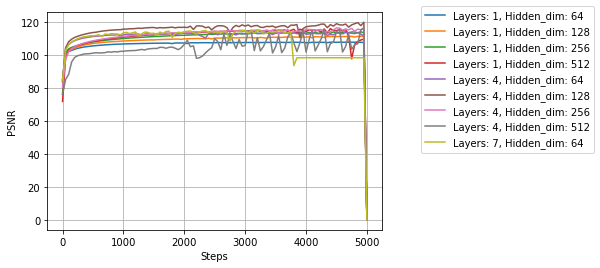

In [19]:
plt.figure()
l = []
s = np.arange(0, steps+2, 50)
i = 0
for (nx, nl) in enumerate(n_layers):
    for (hx, hd) in enumerate(hidden_dims): 
        if res_psnr[nx,hx,5] !=0:
            plt.plot(s, res_psnr[nx,hx,:])
            l.append(labs[i])
        i +=1
        
plt.grid()
plt.legend(l,bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Steps')
plt.ylabel('PSNR')

Text(0, 0.5, 'SSIM')

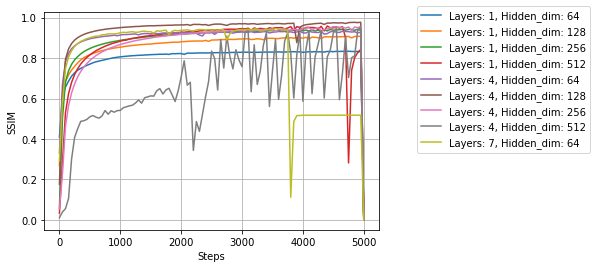

In [20]:
plt.figure()
s = np.arange(0, steps+2, 50)
i = 0

for (nx, nl) in enumerate(n_layers):
    for (hx, hd) in enumerate(hidden_dims): 
        if res_psnr[nx,hx,5] !=0:
            plt.plot(s, res_ssim[nx,hx,:])
            l.append(labs[i])
        i +=1        
plt.grid()
plt.legend(l, bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Steps')
plt.ylabel('SSIM')